In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.shape

(1235, 29)

In [4]:
test_data.shape

(824, 28)

In [5]:
train_data.head()


,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [6]:
test_data.head()


,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,None,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,None,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


In [7]:
train_data.isnull().sum()


id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [8]:
test_data.isnull().sum()


id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [9]:
train_data = train_data.drop(columns=['id'])


In [10]:
train_data.dtypes


surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object

In [11]:
train_data['nasogastric_reflux_ph'].isnull().sum()


0

In [12]:
train_data['nasogastric_reflux_ph'].dtypes == 'float64'


True

In [13]:
train_data['nasogastric_reflux_ph'].mean()


4.382591093117409

In [14]:
train_data['temp_of_extremities'].mode()[0]


'cool'

In [15]:
train_data.groupby('outcome')['abdomen'].transform(lambda x: x.mode().iloc[0]).mode()[0]


'distend_small'

In [16]:
for i in train_data.columns:
    if train_data[i].isnull().sum() > 0 and train_data[i].dtypes == 'float64':
        mean_val = train_data[i].mean()
        train_data[i].fillna(mean_val,inplace=True)
        
    elif train_data[i].isnull().sum() > 0 and train_data[i].dtypes == 'object':
        mode_val = train_data.groupby('outcome')[i].transform(lambda x: x.mode().iloc[0]).mode()[0]
        train_data[i].fillna(mode_val,inplace=True)

In [17]:
train_data.isnull().sum().sum()


0

In [18]:
for i in test_data.columns:
    if test_data[i].isnull().sum() > 0 and test_data[i].dtypes == 'float64':
        mean_val = test_data[i].mean()
        test_data[i].fillna(mean_val,inplace=True)
        
    elif test_data[i].isnull().sum() > 0 and test_data[i].dtypes == 'object':
        mode_val = test_data[i].mode()[0]
        test_data[i].fillna(mode_val,inplace=True)

In [19]:
test_data.isnull().sum().sum()


0

In [20]:
label_enc = LabelEncoder()


In [21]:
for i in train_data.columns:
    if train_data[i].dtypes == 'object':
        train_data[i] = label_enc.fit_transform(train_data[i])

In [22]:
train_data.head()


,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,1,0,530001,38.1,132.0,24.0,2,4,3,3,...,57.0,8.5,3,3.4,1,2209,0,0,0,0
1,1,0,533836,37.5,88.0,12.0,2,3,5,3,...,33.0,64.0,3,2.0,1,2208,0,0,0,1
2,1,0,529812,38.3,120.0,28.0,2,4,6,2,...,37.0,6.4,3,3.4,1,5124,0,0,0,2
3,1,0,5262541,37.1,72.0,30.0,1,4,6,3,...,53.0,7.0,2,3.9,1,2208,0,0,1,2
4,0,0,5299629,38.0,52.0,48.0,3,3,4,2,...,47.0,7.3,2,2.6,0,0,0,0,1,2


In [23]:
train_data.isnull().sum()


surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [24]:
for i in test_data.drop(columns=['hospital_number','id']).columns:
    if test_data[i].dtypes == 'object':
        test_data[i] = label_enc.fit_transform(test_data[i])

In [25]:
test_data.head()


,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,0,0,534053,38.6,40.0,20.0,3,3,4,...,2,42.0,7.5,1,2.3,0,0,0,0,0
1,1236,1,0,528469,38.2,112.0,48.0,2,4,1,...,2,44.0,6.0,3,2.6,0,2208,0,0,1
2,1237,1,0,528178,37.7,66.0,12.0,2,3,2,...,2,31.5,6.0,2,1.6,1,2205,0,0,1
3,1238,0,0,534784,37.1,88.0,20.0,2,4,5,...,1,75.0,81.0,0,1.0,1,1400,0,0,0
4,1239,1,0,529840,38.3,50.0,12.0,0,3,1,...,2,37.0,6.8,2,2.6,1,2208,0,0,1


In [26]:
test_data.isnull().sum()


id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

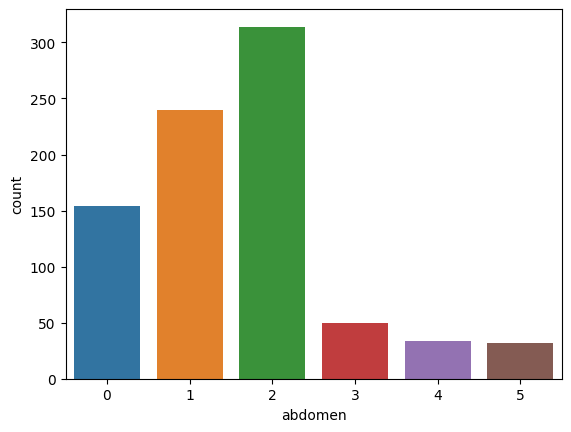

In [27]:
sns.countplot(x=test_data['abdomen'],data=test_data.drop(columns=['hospital_number','id']))
plt.show()

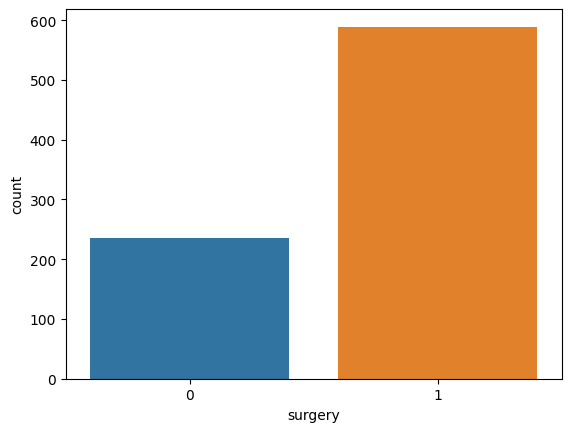

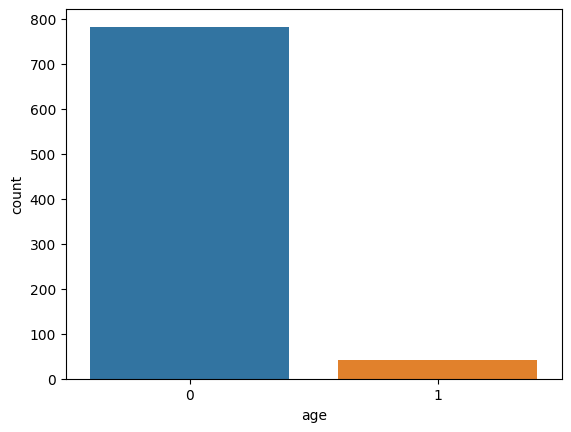

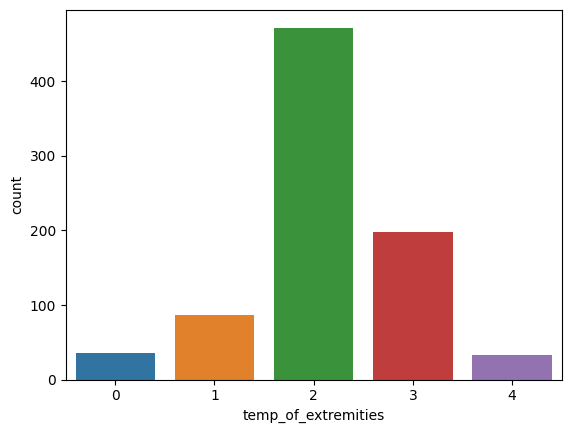

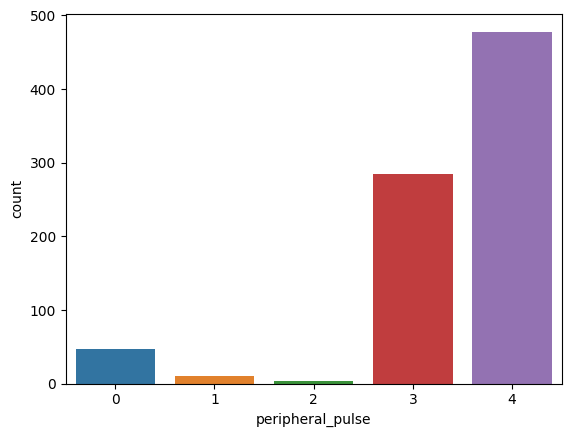

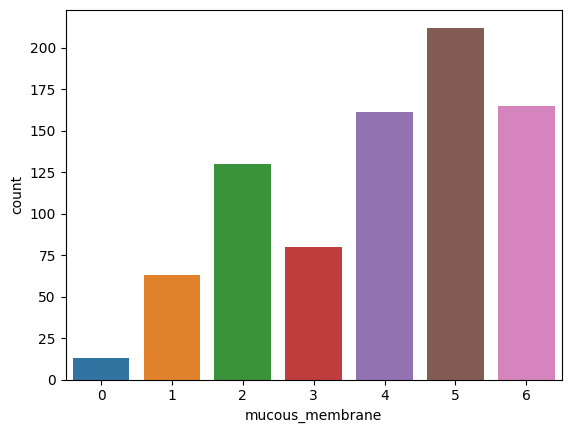

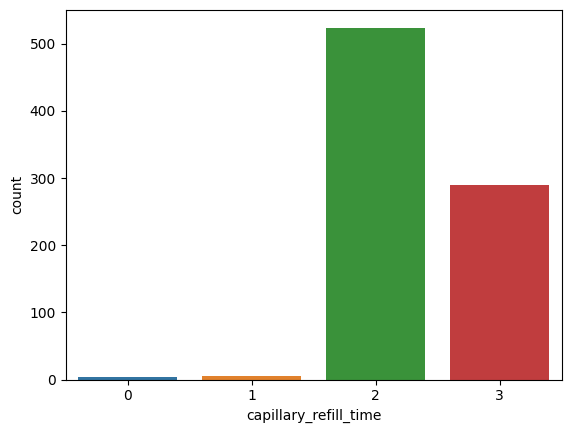

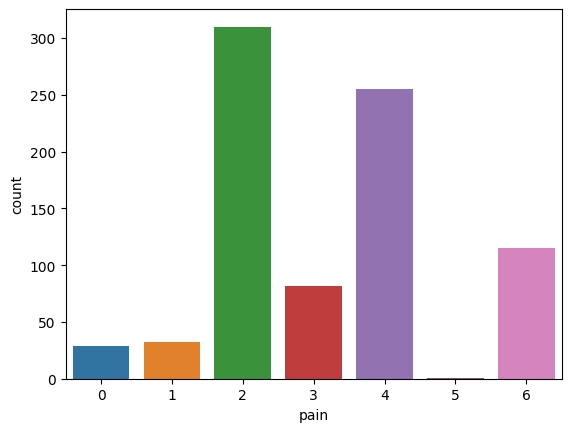

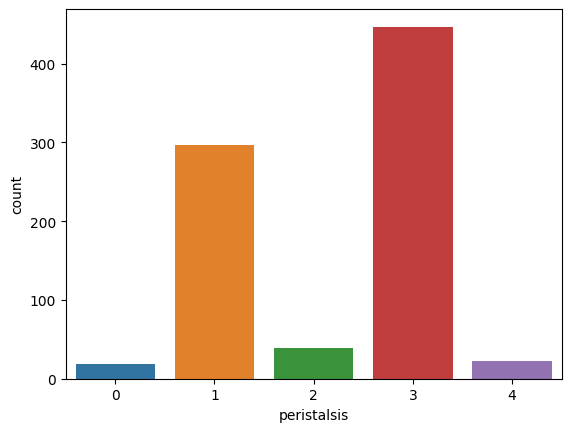

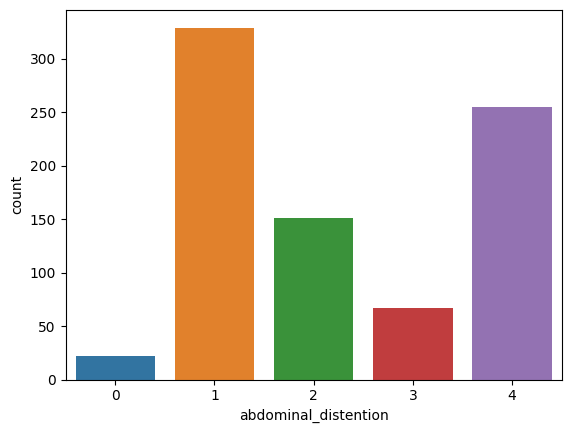

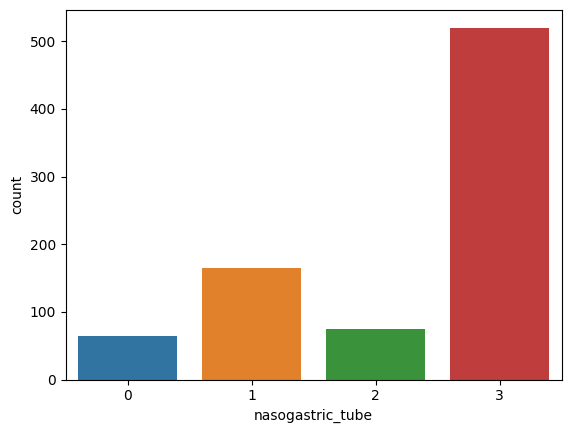

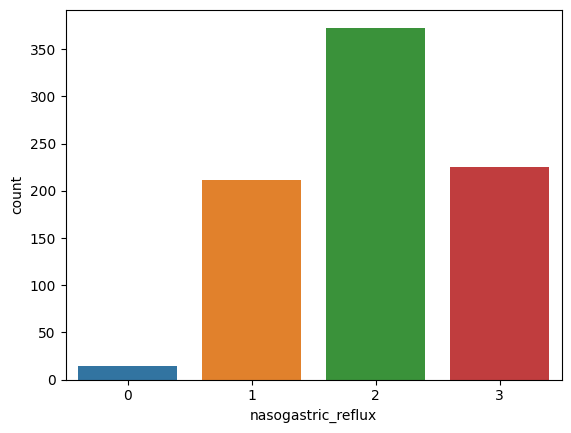

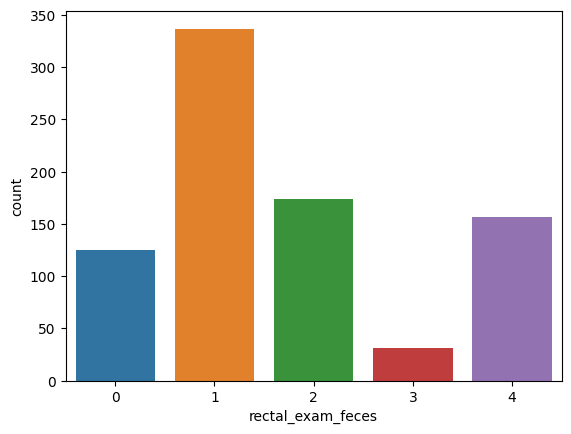

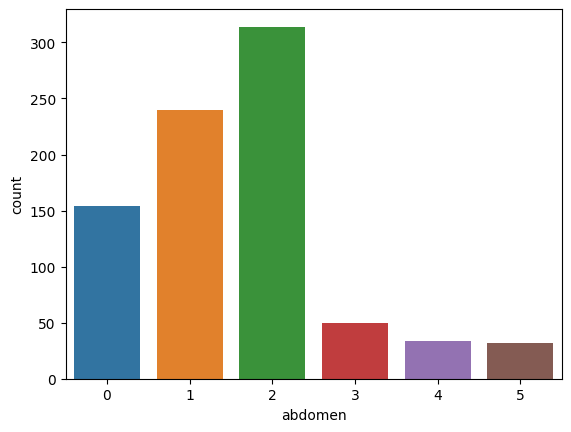

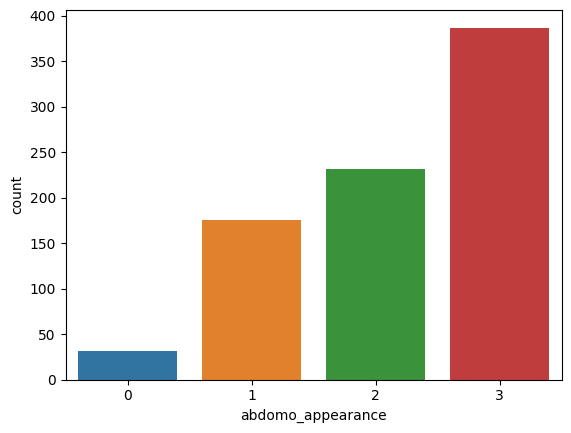

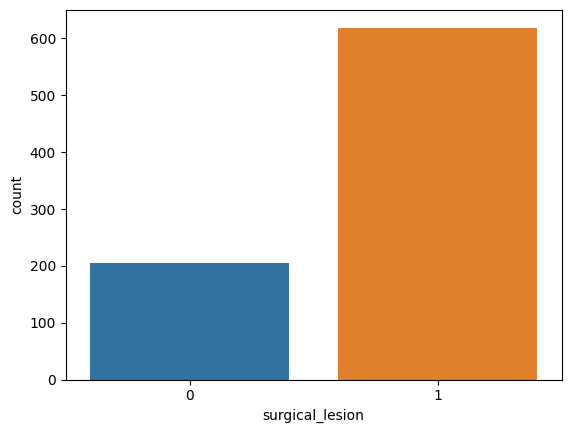

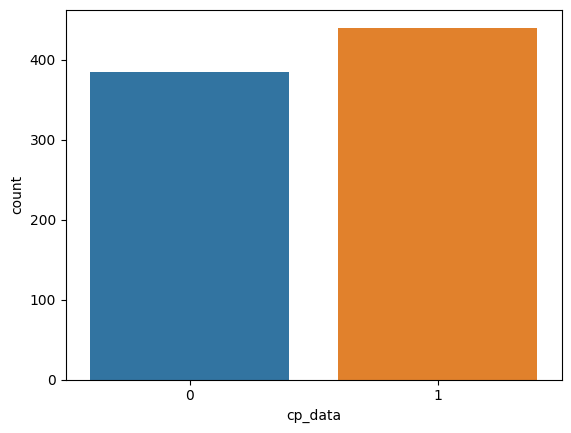

In [28]:
for i,col in enumerate(test_data.drop(columns=['hospital_number','id']).columns):
    if test_data[col].dtypes == 'int':
        plt.figure(i)
        sns.countplot(x=col,data=test_data)

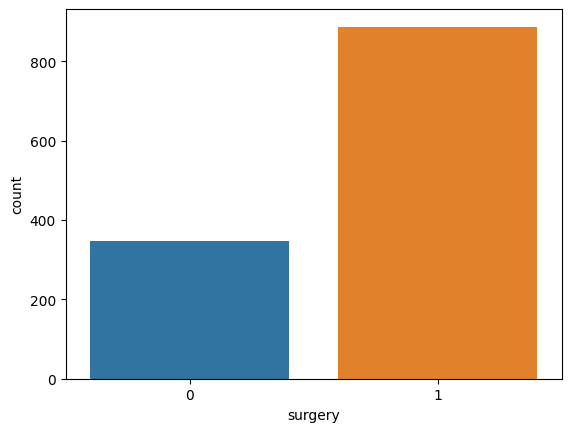

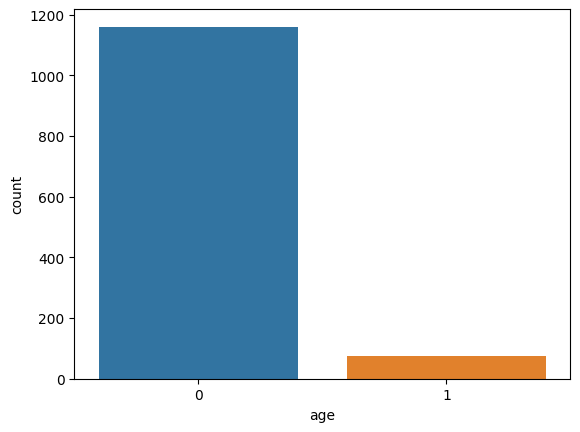

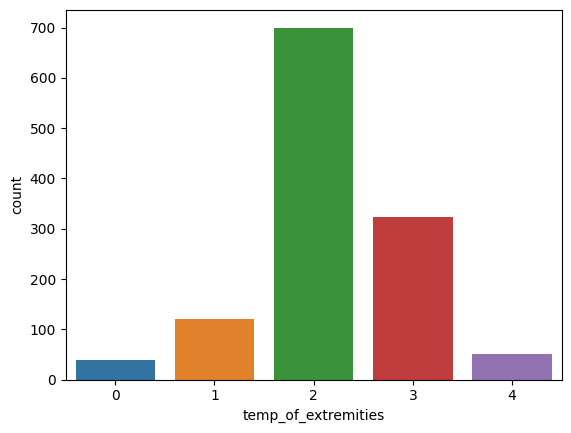

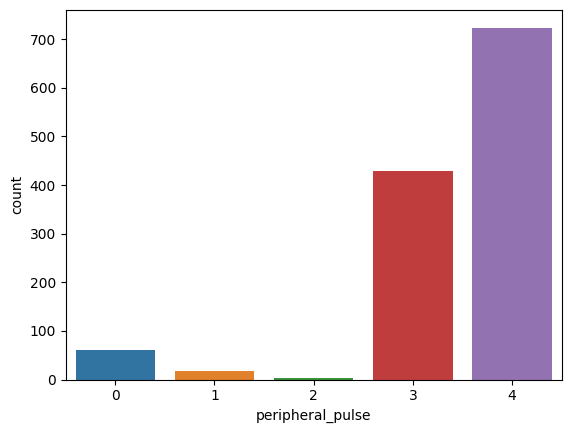

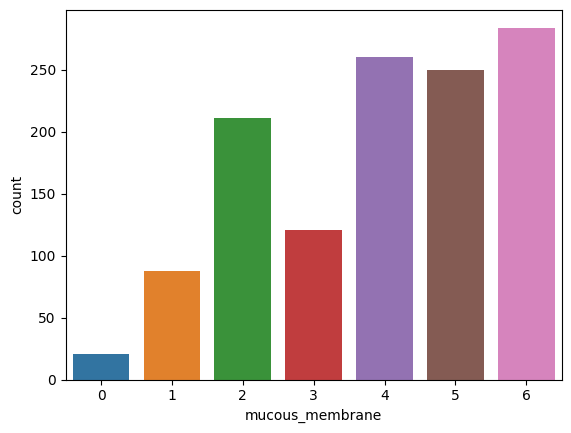

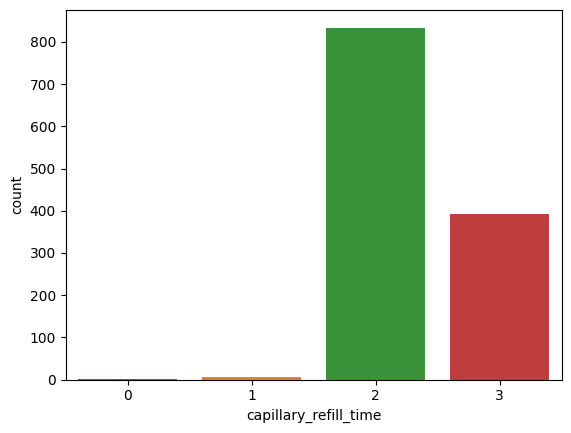

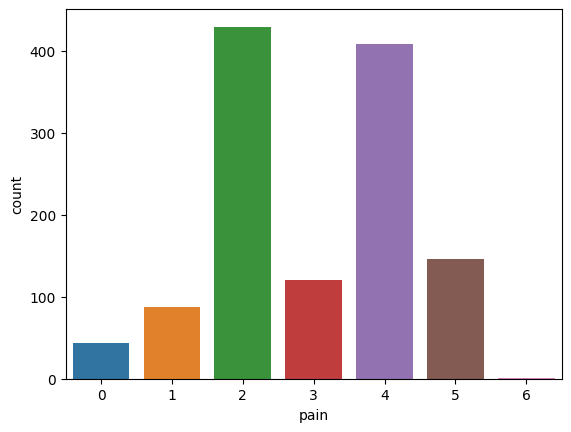

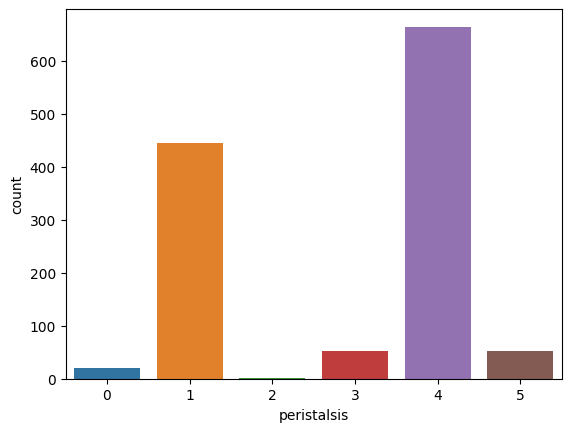

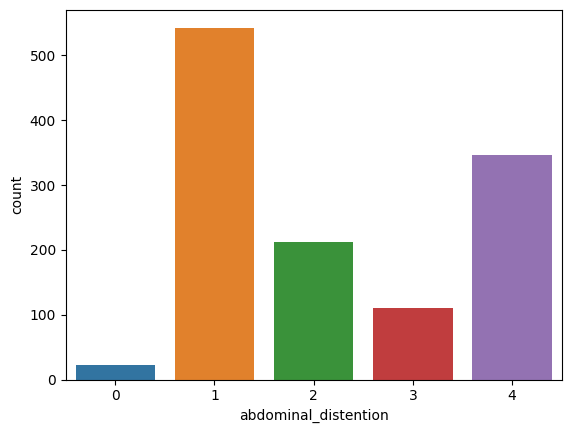

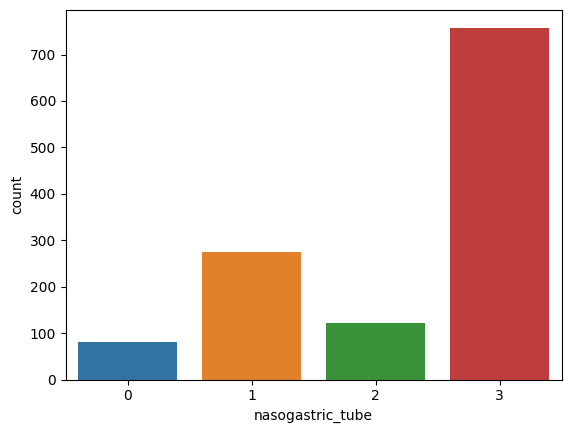

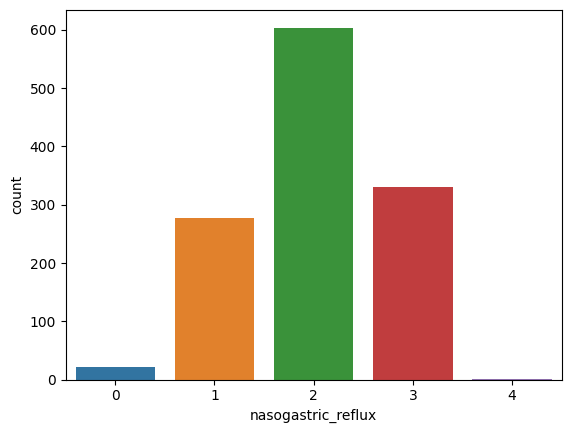

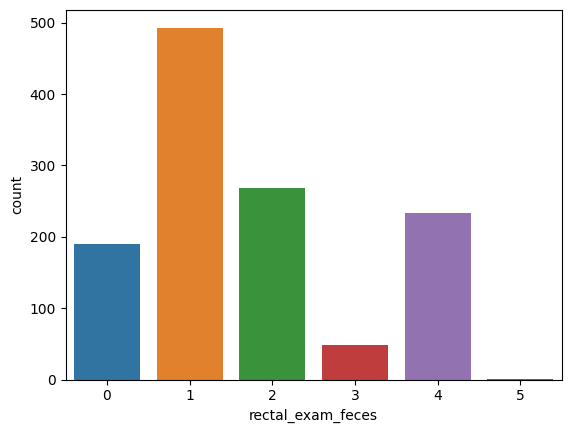

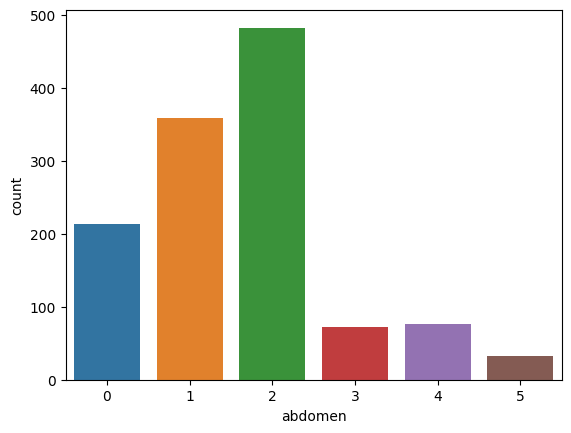

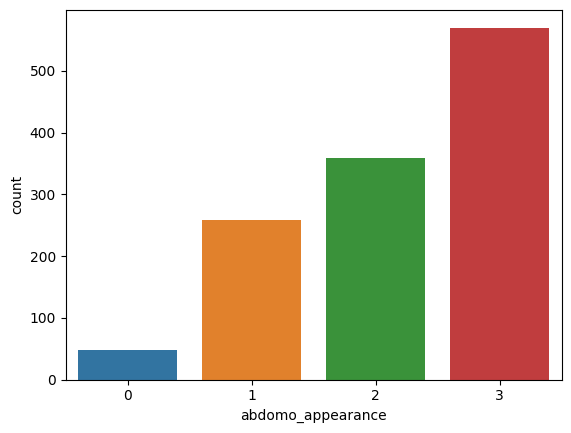

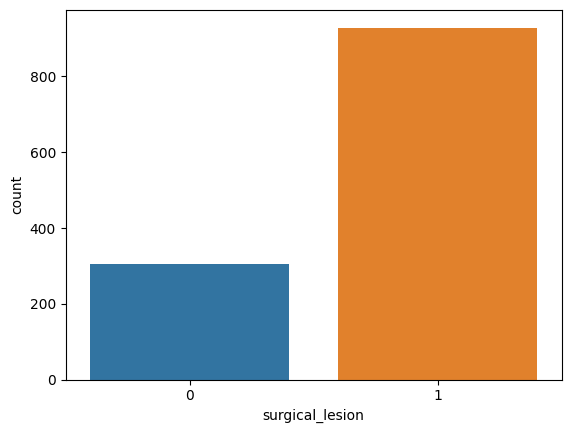

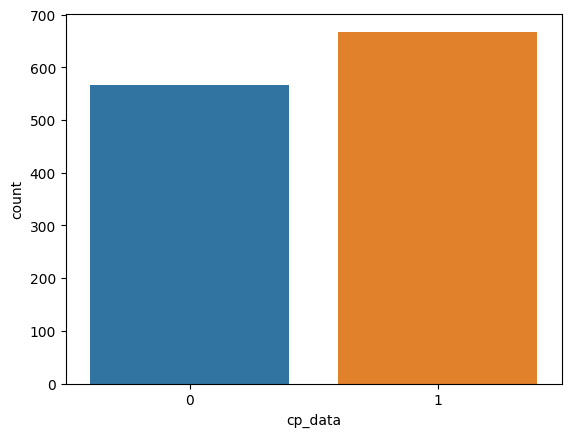

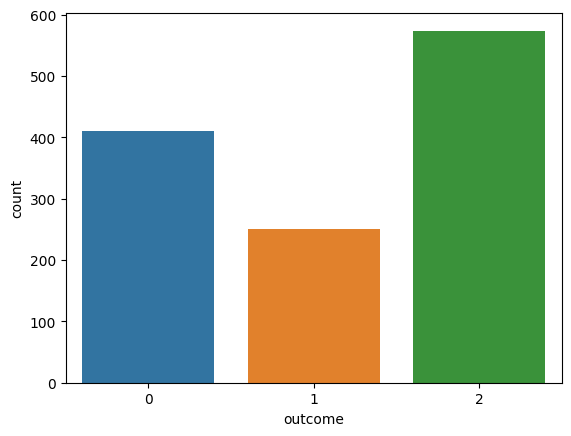

In [29]:
for i,col in enumerate(train_data.columns):
    if train_data[col].dtypes == 'int':
        plt.figure(i)
        sns.countplot(x=col,data=train_data)

In [30]:
train_data.dtypes == 'float'


surgery                  False
age                      False
hospital_number          False
rectal_temp               True
pulse                     True
respiratory_rate          True
temp_of_extremities      False
peripheral_pulse         False
mucous_membrane          False
capillary_refill_time    False
pain                     False
peristalsis              False
abdominal_distention     False
nasogastric_tube         False
nasogastric_reflux       False
nasogastric_reflux_ph     True
rectal_exam_feces        False
abdomen                  False
packed_cell_volume        True
total_protein             True
abdomo_appearance        False
abdomo_protein            True
surgical_lesion          False
lesion_1                 False
lesion_2                 False
lesion_3                 False
cp_data                  False
outcome                  False
dtype: bool

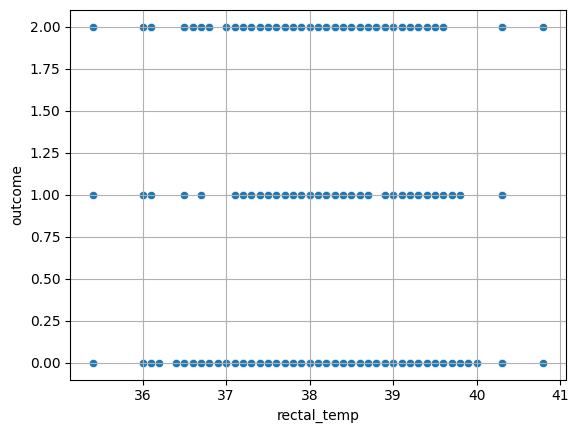

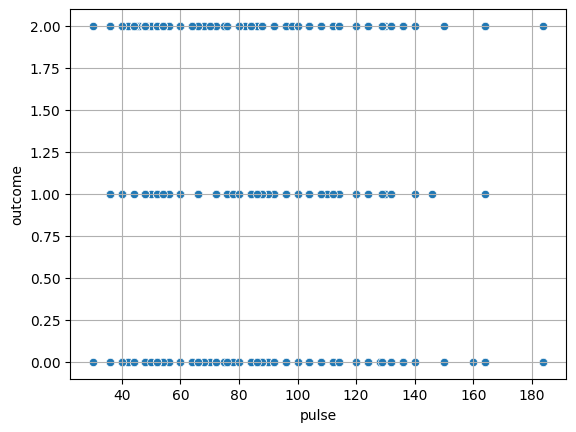

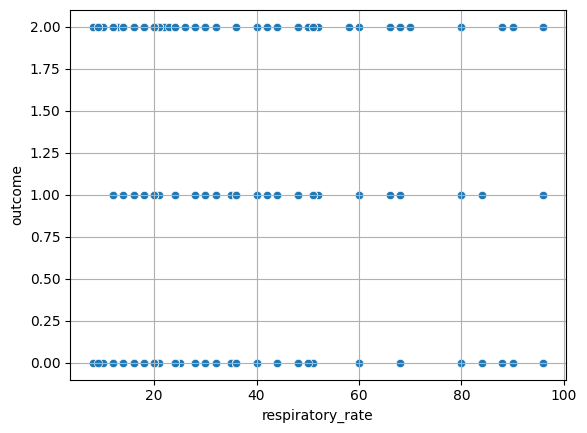

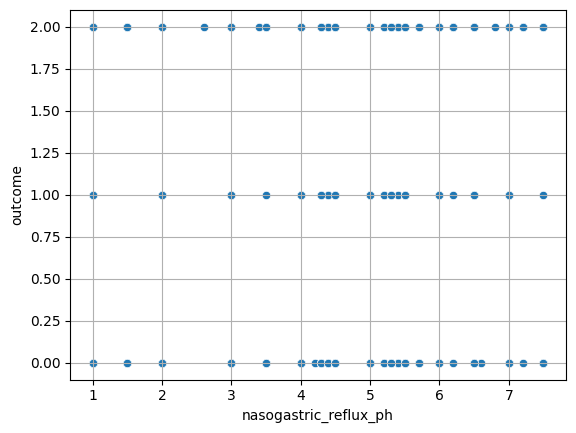

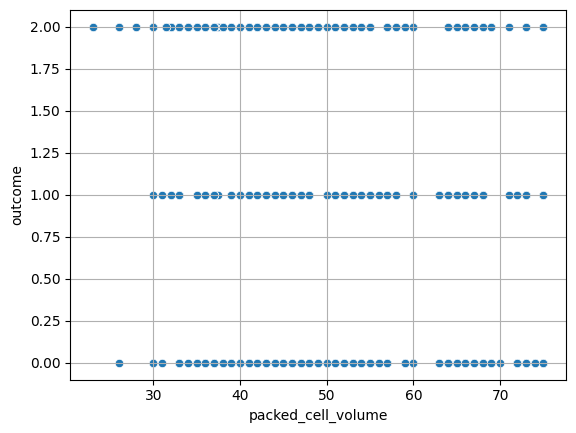

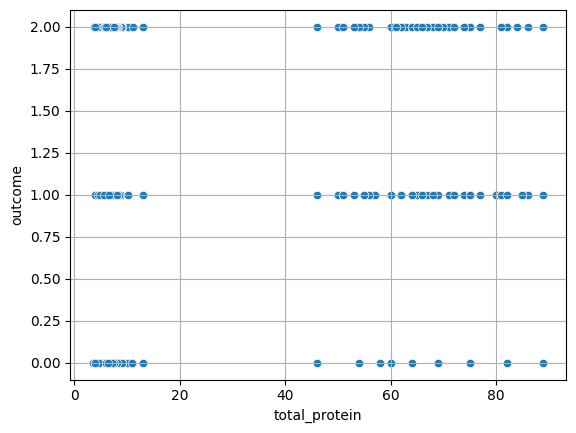

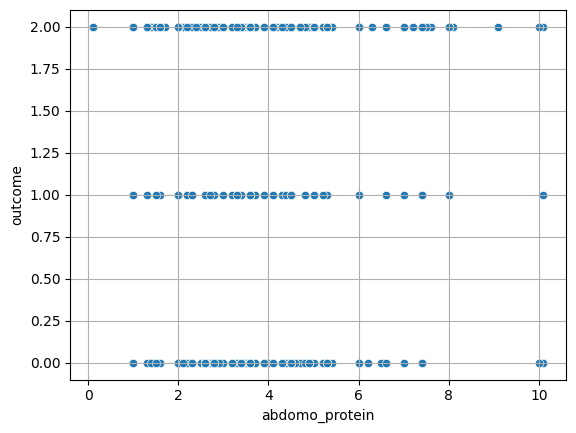

In [31]:
for j,col1 in enumerate(train_data.columns):
    if train_data[col1].dtypes == 'float':
        plt.figure(j)
        sns.scatterplot(x=col1,y='outcome',data=train_data)
        plt.grid()

In [32]:

X_train,X_test,Y_train,Y_test = train_test_split(train_data.drop(columns=['outcome','lesion_2', 'lesion_3']),
                                                train_data['outcome'],test_size=0.3,random_state=0)

In [33]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, min_samples_split=2)
svm = SVC(C=1.0, random_state=None)
histg = HistGradientBoostingClassifier(loss='auto', learning_rate=0.1, max_iter=100)
gboost = GradientBoostingClassifier()
dtree = DecisionTreeClassifier()

In [34]:
model_perform = {}
def fit_model(model,X_train,X_test,Y_train,Y_test,name):
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test,y_pred)
    model_perform[name] = acc

In [35]:
fit_model(knn,X_train,X_test,Y_train,Y_test,"knn")
fit_model(rf,X_train,X_test,Y_train,Y_test,"rf")
fit_model(svm,X_train,X_test,Y_train,Y_test,"svm")
fit_model(histg,X_train,X_test,Y_train,Y_test,"histg")
fit_model(gboost,X_train,X_test,Y_train,Y_test,"gboost")
fit_model(dtree,X_train,X_test,Y_train,Y_test,"dtree")


c:\Users\gnana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py:1823: FutureWarning: The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
  warnings.warn(


In [36]:
model_perform


{'knn': 0.6630727762803235,
 'rf': 0.7250673854447439,
 'svm': 0.477088948787062,
 'histg': 0.7304582210242587,
 'gboost': 0.738544474393531,
 'dtree': 0.5795148247978437}

In [37]:
histg = HistGradientBoostingClassifier(
    max_depth=4,          
    max_iter=80,         
    learning_rate=0.1,     
    random_state=42,   
    scoring='f1_micro',          
    max_leaf_nodes = 21,
    l2_regularization = 0.1,
).fit(X_train,Y_train)

In [38]:
final_output = histg.predict(test_data.drop(columns=['id','lesion_2', 'lesion_3']))


In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'max_iter': [50, 80, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_leaf_nodes': [15, 21, 30],
    'l2_regularization': [0.0, 0.1, 0.2]
}

histg = HistGradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=histg, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_histg = HistGradientBoostingClassifier(**best_params, random_state=42).fit(X_train, Y_train)

y_pred = best_histg.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy with best parameters:", accuracy)

Best Parameters: {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 50, 'max_leaf_nodes': 15}
Best Score: 0.6828269928753865
Accuracy with best parameters: 0.7601078167115903


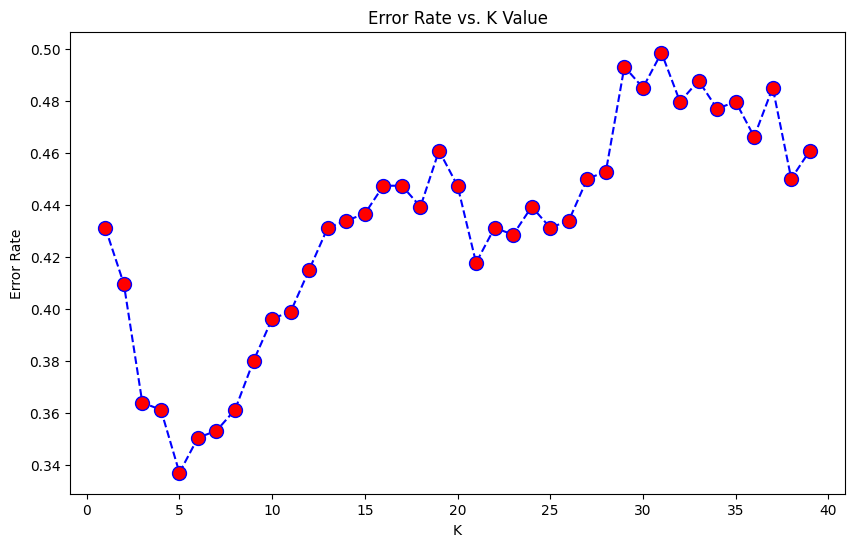

In [40]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [41]:
# Find the best value of k (the one with the lowest error rate)
best_k = error_rate.index(min(error_rate)) + 1

# Create a new KNeighborsClassifier with the best value of k
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Fit the model on the training data
best_knn.fit(X_train, Y_train)

# Predict on the test data
knn_predictions = best_knn.predict(X_test)

# Print the best value of k and the accuracy of the model
knn_accuracy = accuracy_score(Y_test, knn_predictions)
print(f"Best k: {best_k}")
print(f"Accuracy with best k: {knn_accuracy}")

Best k: 5
Accuracy with best k: 0.6630727762803235


In [42]:
X_train

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,cp_data
565,1,0,528469,39.0,88.0,28.0,3,4,3,3,...,7.0,1,2,64.0,7.6,2,2.6,1,2208,0
799,1,0,530254,38.6,80.0,32.0,2,3,6,2,...,6.5,1,2,33.0,6.5,3,4.5,1,3205,0
272,1,0,5290409,37.2,108.0,48.0,1,4,6,3,...,5.4,2,1,55.0,6.5,3,4.5,0,4205,1
1070,0,0,529340,38.0,48.0,20.0,3,3,4,2,...,5.0,2,3,40.0,6.5,1,1.5,0,9400,1
165,0,0,529272,38.1,112.0,84.0,2,4,5,3,...,5.0,4,2,48.0,8.0,3,2.6,0,3133,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,0,534917,38.8,44.0,12.0,2,4,6,2,...,4.4,1,2,40.0,67.0,2,2.0,1,2209,1
835,1,0,5301219,39.9,96.0,24.0,2,4,0,1,...,6.0,1,1,45.0,7.5,3,2.3,1,3205,1
1216,1,0,534293,38.5,132.0,48.0,2,4,5,3,...,2.0,1,0,57.0,82.0,2,2.0,0,1400,0
559,1,0,533692,38.7,120.0,10.0,0,0,4,2,...,1.0,2,4,34.0,75.0,1,1.0,1,3111,0


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming X_train and X_test are already defined and preprocessed
# Reshape the data to fit the model (assuming grayscale images)
# Assuming the images are 28x28 pixels, calculate the correct number of samples
# Calculate the correct dimensions for reshaping
num_samples = X_train.shape[0]
image_size = int(np.sqrt(X_train.shape[1]))  # Assuming the images are square

# Reshape the data to fit the model
X_train_reshaped = X_train.values.reshape(num_samples, image_size, image_size, 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], image_size, image_size, 1)

# Convert labels to categorical
Y_train_categorical = to_categorical(Y_train)
Y_test_categorical = to_categorical(Y_test)

# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 1), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with increased epochs
model.fit(X_train_reshaped, Y_train_categorical, validation_data=(X_test_reshaped, Y_test_categorical), epochs=20, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test_reshaped, Y_test_categorical, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Predict on the test data
y_pred_categorical = model.predict(X_test_reshaped)
y_pred = y_pred_categorical.argmax(axis=1)
y_true = Y_test_categorical.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

c:\Users\gnana\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3852 - loss: 26104.4551 - val_accuracy: 0.4609 - val_loss: 13583.3936
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3958 - loss: 14164.1807 - val_accuracy: 0.4609 - val_loss: 2016.2394
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4277 - loss: 8877.6885 - val_accuracy: 0.4609 - val_loss: 530.1105
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3775 - loss: 5488.0933 - val_accuracy: 0.4609 - val_loss: 284.5180
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3854 - loss: 4392.6729 - val_accuracy: 0.4609 - val_loss: 252.9377
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3739 - loss: 3631.3506 - val_accuracy: 0.3504 - val_loss: 174.8379
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4030 - loss: 2548.8123 - val_accuracy: 0.4609 - val_loss: 76.9683
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3575 - loss: 2

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming X_train and X_test are already defined and preprocessed
# Reshape the data to fit the LSTM model (assuming time steps and features)
# Here, we assume each sample has been reshaped to (time_steps, features)
time_steps = 5  # Example value, adjust based on your data
features = X_train.shape[1] // time_steps

# Reshape the data to fit the LSTM model
X_train_reshaped = X_train.values.reshape((X_train.shape[0], time_steps, features))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], time_steps, features))

# Convert labels to categorical
Y_train_categorical = to_categorical(Y_train)
Y_test_categorical = to_categorical(Y_test)

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, features)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, Y_train_categorical, validation_data=(X_test_reshaped, Y_test_categorical), epochs=35, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test_reshaped, Y_test_categorical, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Predict on the test data
y_pred_categorical = model.predict(X_test_reshaped)
y_pred = y_pred_categorical.argmax(axis=1)
y_true = Y_test_categorical.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Epoch 1/35


c:\Users\gnana\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4177 - loss: 1.0776 - val_accuracy: 0.4609 - val_loss: 1.0022
Epoch 2/35
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4541 - loss: 1.0142 - val_accuracy: 0.5660 - val_loss: 0.9225
Epoch 3/35
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5502 - loss: 0.9283 - val_accuracy: 0.6226 - val_loss: 0.8432
Epoch 4/35
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5960 - loss: 0.8750 - val_accuracy: 0.6119 - val_loss: 0.8318
Epoch 5/35
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5635 - loss: 0.8836 - val_accuracy: 0.6307 - val_loss: 0.8172
Epoch 6/35
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5677 - loss: 0.8867 - val_accuracy: 0.6442 - val_loss: 0.8039
Epoch 7/35
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5762 - loss: 0.8941 - val_accuracy: 0.6577 - val_loss: 0.7995
Epoch 8/35
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5902 - loss: 0.8702 - val_accuracy: 0.6577 - val_loss: 0.7882
Ep

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Baseline Model: Logistic Regression
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, Y_train)
baseline_predictions = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(Y_test, baseline_predictions)
print(f'Baseline Model Accuracy: {baseline_accuracy}')

# Improved Model: RandomForestClassifier with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, Y_train)

best_rf = grid_search.best_estimator_
improved_predictions = best_rf.predict(X_test)
improved_accuracy = accuracy_score(Y_test, improved_predictions)
print(f'Improved Model Accuracy: {improved_accuracy}')
print(f'Best Parameters: {grid_search.best_params_}')

Baseline Model Accuracy: 0.41778975741239893
Improved Model Accuracy: 0.7088948787061995
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [46]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Apply PCA to the training data
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier using the reduced data
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, Y_train)

# Predict on the test data
y_pred_pca = rf_pca.predict(X_test_pca)

# Calculate accuracy
accuracy_pca = accuracy_score(Y_test, y_pred_pca)
print(f'Accuracy with PCA: {accuracy_pca}')

# Identify the features that contribute the most to the principal components
components = pca.components_
feature_importance = np.abs(components).sum(axis=0)
important_features = np.argsort(feature_importance)[::-1]

print("Top features contributing to the principal components:")
for i in important_features[:10]:  # Adjust the number of features to display
    print(f"Feature {i}: {feature_importance[i]}")

Accuracy with PCA: 0.633423180592992
Top features contributing to the principal components:
Feature 15: 1.8427286928380657
Feature 21: 1.6264500815191896
Feature 8: 1.4991025762593169
Feature 4: 1.461724502308934
Feature 11: 1.4470200537358686
Feature 5: 1.2871494139615565
Feature 18: 1.2869180578273762
Feature 19: 1.1643242505701483
Feature 10: 1.0603511457825034
Feature 23: 1.0007625590951996


In [47]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

# Apply PCA to the training and test data
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train an SVM classifier using the reduced data
svm_pca = SVC()
svm_pca.fit(X_train_pca, Y_train)

# Predict on the test data
y_pred_pca_svm = svm_pca.predict(X_test_pca)

# Calculate accuracy
accuracy_pca_svm = accuracy_score(Y_test, y_pred_pca_svm)
print(f'Accuracy with PCA and SVM: {accuracy_pca_svm}')

# Generate confusion matrix
conf_matrix_pca_svm = confusion_matrix(Y_test, y_pred_pca_svm)
print('Confusion Matrix with PCA and SVM:')
print(conf_matrix_pca_svm)

Accuracy with PCA and SVM: 0.477088948787062
Confusion Matrix with PCA and SVM:
[[ 16   0 114]
 [  2   0  68]
 [ 10   0 161]]


In [48]:
# Apply PCA to the training and test data
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a KNN classifier using the reduced data
knn_pca = KNeighborsClassifier(n_neighbors=best_k)  # Using the best_k value from previous KNN tuning
knn_pca.fit(X_train_pca, Y_train)

# Predict on the test data
y_pred_pca_knn = knn_pca.predict(X_test_pca)

# Calculate accuracy
accuracy_pca_knn = accuracy_score(Y_test, y_pred_pca_knn)
print(f'Accuracy with PCA and KNN: {accuracy_pca_knn}')

# Generate confusion matrix
conf_matrix_pca_knn = confusion_matrix(Y_test, y_pred_pca_knn)
print('Confusion Matrix with PCA and KNN:')
print(conf_matrix_pca_knn)

Accuracy with PCA and KNN: 0.6630727762803235
Confusion Matrix with PCA and KNN:
[[ 86   4  40]
 [ 14  40  16]
 [ 35  16 120]]
